In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Labo Week 6 

### **Deel 1** **Alternatieve metrieken om modellen te vergelijken**


**Oefening 1** : 

Gebruik voor deze oefening de cijfers.txt datafile uit labo 5. Stel 2 verschillende classificatiemethoden op : (lineaire model en decision trees) en gebruik onderstaande metrieken om de 2 modellen te vergelijken. 

**1.1** Gebruik 25% van de data om te testen en bereken van beide alvast de klassieke accuracy.

**1.2** Bereken daarna de confusion matrix van beide modellen, gebruik hierbij :
```
from sklearn.metrics import confusion_matrix
```

**1.3** Bepaal nu de precision, recall en F1 score via :
```
from sklearn.metrics import classification_report
```

**1.4** Teken ten slotte de ROC curve. Hiervoor moet je de false positive rate uitzetten t.o.v de true positive rate. Je zal eerst voor elk element in de test set de kans om terecht te komen in de true state (toeglaten) moeten berekenen, dit kan via de methode : 
```
modellogistRegr.predict_proba(x_Examtest)[:,1]
```
Via de 
```
from sklearn.metrics import roc_curve
```
kan je nu de false positive en true positive rate berekenen en kan je deze plotten t.o.v. elkaar

_Tip:_ [Goeie blog rond de verschillende technieken](https://medium.com/hugo-ferreiras-blog/confusion-matrix-and-other-metrics-in-machine-learning-894688cb1c0a)


In [2]:
cijfers = pd.read_csv("cijfers.txt", header=None, names=["Examen1","Examen2", "Toegelaten"])

In [3]:
#1.1
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
X = cijfers[['Examen1','Examen2']]
Y = cijfers['Toegelaten']
X_Train, X_Test, Y_Train, Y_Test = train_test_split(cijfers[['Examen1','Examen2']],cijfers['Toegelaten'],random_state=0, test_size=0.75, stratify=cijfers['Toegelaten'])
tree = DecisionTreeClassifier(max_depth=4)
tree.fit(X_Train, Y_Train)
lin = LogisticRegression(C=0.9)
lin.fit(X_Train, Y_Train)
print("tree:",tree.score(X_Test, Y_Test))
print("lin:",lin.score(X_Test, Y_Test))

tree: 0.7866666666666666
lin: 0.84


In [4]:
#1.2
from sklearn.metrics import confusion_matrix
treepred = tree.predict(X)
linpred = lin.predict(X)
print("confusion tree:\n",confusion_matrix(Y, treepred))
print("confusion tree:\n",confusion_matrix(Y, linpred))

confusion tree:
 [[31  9]
 [ 7 53]]
confusion tree:
 [[31  9]
 [ 6 54]]


In [5]:
#1.3
from sklearn.metrics import classification_report
treepred = tree.predict(X)
linpred = lin.predict(X)
print("report tree:\n",classification_report(Y, treepred))
print("report tree:\n",classification_report(Y, linpred))

report tree:
               precision    recall  f1-score   support

           0       0.82      0.78      0.79        40
           1       0.85      0.88      0.87        60

    accuracy                           0.84       100
   macro avg       0.84      0.83      0.83       100
weighted avg       0.84      0.84      0.84       100

report tree:
               precision    recall  f1-score   support

           0       0.84      0.78      0.81        40
           1       0.86      0.90      0.88        60

    accuracy                           0.85       100
   macro avg       0.85      0.84      0.84       100
weighted avg       0.85      0.85      0.85       100



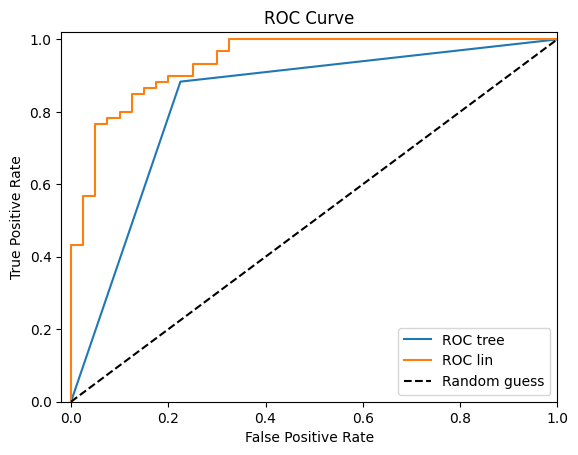

In [6]:
#1.4
from sklearn.metrics import roc_curve
treepredproba = tree.predict_proba(X)[:,1] #positive; negative at 0
linpredproba = lin.predict_proba(X)[:,1] # positive; negative at 0

fpr_t, tpr_t, thresholds_t = roc_curve(Y, treepredproba)
fpr_l, tpr_l, thresholds_l = roc_curve(Y, linpredproba)
plt.plot(fpr_t, tpr_t, label = "ROC tree")
plt.plot(fpr_l, tpr_l, label = "ROC lin")
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.title('ROC Curve')
_ = plt.xlim([-0.02, 1])
_ = plt.ylim([0, 1.02])
_ = plt.legend(loc="lower right")

### **Deel 2** Het effect van schalen van data

Het schalen van features kan een grote impact hebben op het eindresultaat van sommige algoritmen, terwijl bij andere er amper een effect te zien is. Wanneer de dataset features bevat die heel erg variëren in grootte, eenheden en ranges en je een algoritme wil gebruiken dat afhankelijk is van de Euclidische afstandsmaat is het een goed idee om je data eerst de schalen.

**Oefening 2** 
Hergebruik in deze oefening de _auto\_extra.txt_ datafile met het _mpg_ regressie probleem. 

 **2.1**  Maak een boxplot van de featuredata om te zien hoe deze varieert in grootte en schaal t.o.v. elkaar. Info over maken van boxplots : https://matplotlib.org/3.2.1/gallery/pyplots/boxplot_demo_pyplot.html
 Teken deze boxplots opnieuw na schaling van de data door de varianten MinMaxScaler, standardScaler, RobustScaler
 
 **2.2** Test enkele algoritmen die je kent (Lineaire regressie, Lasso, Ridge, KNN, DecisionTree, RandomForest, ...) en ga na welke hiervan baat hebben bij schaling op deze data (probeer de varianten MinMaxScaler, StandardScaler, RobustScaler).
 Geef je resultaten weer in een pandas dataframe. Je mag van elk algoritme de default parametersettings gebruiken, op die manier kan je het opstellen en fitten van al deze modellen op een algemene manier via een functie doen, waarbij je een lijst van scalers en een lijst van modellen meegeeft als argument.
 Bvb :
  ```
 def runScalers(models, scalers)
 ```

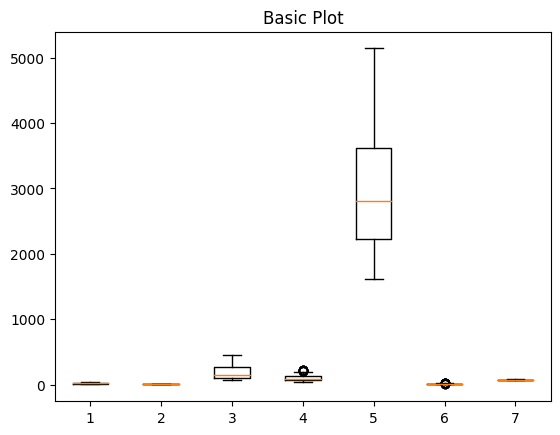

In [7]:
#2.1
df = pd.read_table('auto_extra.txt', delim_whitespace=True)
def isnumeric(x):
    try:
        return float(x)
    except:
        return np.nan
df['horsepower'] = df['horsepower'].apply(lambda x: isnumeric(x)) # convert ? values to nan
df = df.dropna()
X = df.iloc[:,1:-2]
Y = df.iloc[:,0]
fig1, ax1 = plt.subplots()
ax1.set_title('Basic Plot')
ax1.boxplot(df.iloc[:,:-2])
plt.show()

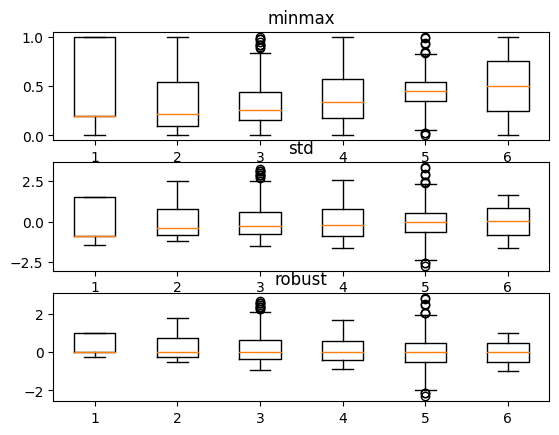

In [8]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
minmax = MinMaxScaler()
std = StandardScaler()
robust = RobustScaler()
minmax, std, robust = (i.fit(X) for i in [minmax, std, robust])
X_1, X_2, X_3 = (i.transform(X) for i in [minmax, std, robust])
fig1, (ax1, ax2, ax3) = plt.subplots(3)
ax1.set_title('minmax')
ax1.boxplot(X_1)
ax2.set_title('std')
ax2.boxplot(X_2)
ax3.set_title('robust')
ax3.boxplot(X_3)
plt.show()

In [9]:
#2.2
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

from sklearn.preprocessing import FunctionTransformer
DummyScaler = FunctionTransformer(lambda x: x)

classifiers = [LinearRegression, Ridge, Lasso, DecisionTreeRegressor, RandomForestRegressor]
scalers = [MinMaxScaler, StandardScaler, RobustScaler, None]

def runscaled(models, scalers, X, Y):
    temp = [i() if i!=None else FunctionTransformer(lambda x: x) for i in scalers]
    sclrs = [i.fit(X) for i in temp]
    data = [i.transform(X) for i in sclrs]
    
    temp = [i() if i!=None else FunctionTransformer(lambda x: x) for i in scalers]
    sclrs = [i.fit(Y.to_numpy().reshape(-1,1)) for i in temp]# issues met single column data
    target = [i.transform(Y.to_numpy().reshape(-1,1)) for i in sclrs]
    sets = []
    for d,t in zip(data,target):
        X_train, X_test, y_train, y_test = train_test_split(d, t, random_state=0)
        sets.append((X_train, X_test, y_train, y_test))
    for model in models:
        for index, scaler in enumerate(scalers):
            print(scaler if scaler!=None else "default")
            print(model)
            clf = model()
            clf.fit(sets[index][0], sets[index][2])
            print("score:",clf.score(sets[index][1], sets[index][3]))
            print()
            #mogelijks is formatten ook interessant
runscaled(classifiers, scalers, X,Y)

<class 'sklearn.preprocessing._data.MinMaxScaler'>
<class 'sklearn.linear_model._base.LinearRegression'>
score: 0.7987997270568146

<class 'sklearn.preprocessing._data.StandardScaler'>
<class 'sklearn.linear_model._base.LinearRegression'>
score: 0.7987997270568146

<class 'sklearn.preprocessing._data.RobustScaler'>
<class 'sklearn.linear_model._base.LinearRegression'>
score: 0.7987997270568145

default
<class 'sklearn.linear_model._base.LinearRegression'>
score: 0.7987997270568145

<class 'sklearn.preprocessing._data.MinMaxScaler'>
<class 'sklearn.linear_model._ridge.Ridge'>
score: 0.7900801298502842

<class 'sklearn.preprocessing._data.StandardScaler'>
<class 'sklearn.linear_model._ridge.Ridge'>
score: 0.7983138604081307

<class 'sklearn.preprocessing._data.RobustScaler'>
<class 'sklearn.linear_model._ridge.Ridge'>
score: 0.7973375273532108

default
<class 'sklearn.linear_model._ridge.Ridge'>
score: 0.798778208375748

<class 'sklearn.preprocessing._data.MinMaxScaler'>
<class 'sklearn.

C:\Users\User\AppData\Local\Temp\ipykernel_17364\2320845932.py:32: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(sets[index][0], sets[index][2])


score: 0.8363207687076868

<class 'sklearn.preprocessing._data.StandardScaler'>
<class 'sklearn.ensemble._forest.RandomForestRegressor'>


C:\Users\User\AppData\Local\Temp\ipykernel_17364\2320845932.py:32: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(sets[index][0], sets[index][2])


score: 0.8450891452542252

<class 'sklearn.preprocessing._data.RobustScaler'>
<class 'sklearn.ensemble._forest.RandomForestRegressor'>


C:\Users\User\AppData\Local\Temp\ipykernel_17364\2320845932.py:32: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(sets[index][0], sets[index][2])


score: 0.8354488849892542

default
<class 'sklearn.ensemble._forest.RandomForestRegressor'>


C:\Users\User\AppData\Local\Temp\ipykernel_17364\2320845932.py:32: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(sets[index][0], sets[index][2])


score: 0.8392751543300413



### **Deel 3** Unsupervised learning : clusteren

**Oefening 3** 

Gegeven volgende artificiële data :

          X         Y color
0 -0.493003 -0.384864   red
1 -0.512196  0.769227   red
2 -0.876710 -0.475072   red
3  2.178424 -0.755303   red
4 -0.725701 -0.509421   red


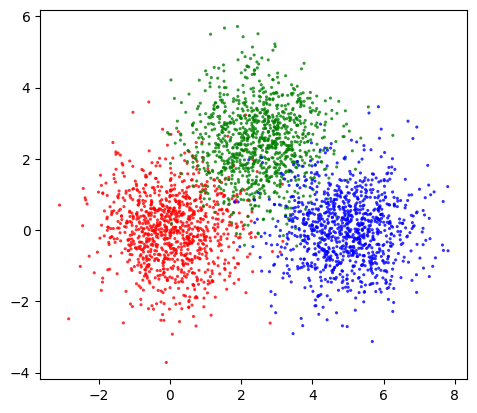

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

N = 1000 
test = pd.DataFrame(np.random.normal(size=(3*N,2)))
test.loc[0:N,2] = 'red'
test.loc[N:2*N,2] = 'green'
test.loc[2*N:3*N,2] = 'blue'
test.columns=['X', 'Y', 'color']
test.iloc[N:2*N,0:2] += 2.5
test.iloc[2*N:3*N,0] += 5

print(test.head())

plt.scatter(test.iloc[:,0], test.iloc[:,1], alpha=0.8, c=test.iloc[:,2], edgecolors='none', s=5)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

   __3.1__ Gebruik k-means(++)  om de gecreërde clusters terug te vinden. Visualiseer de cluster opnieuw en vergelijk met de oorspronkelijke plot. Varieer met de waarde k. 
   
   __3.2__ Probeer de ideale k-waarde te vinden via enerzijds :
       * de Elbow methode om de optimale waarde voor k te bepalen. Hiertoe gebruik je een score functie. Vergelijk tussen twee score functies:
        - inertia of de SSE score :  deze berekent de som van de kwadraten van de afstand van elk punt tot zijn cluster center en kan je gewoon opvragen aan je Kmeans model 
        - Distortion score : Deze berekent de gemiddelde afstand van een punt tot zijn clustercentrum. Gebruik de functie cdist om de  de Euclidische afstand te berekenen.   
    ```
    from scipy.spatial.distance import cdist
    ```
     
      * Ga ook na hoe je de silhouette score kan gebruiken om een keuze van k te maken.  Bereken de Silhouette score van je modellen via : 
 ```
 from sklearn.metrics import silhouette_score
 ```
 
 
  __3.3__ Wat geeft DBSCAN op deze convexe data? Plot je resultaat naast de oorspronkelijke data.
    Bereken ook de silhouette score voor DBSCAN.
 

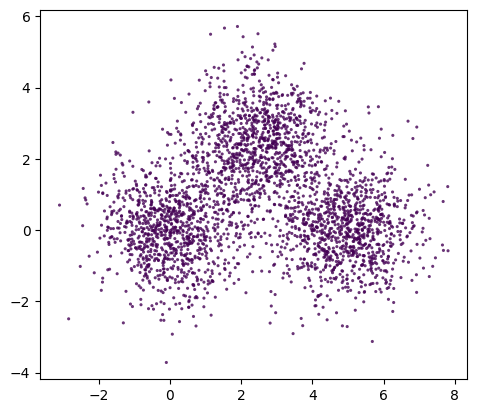

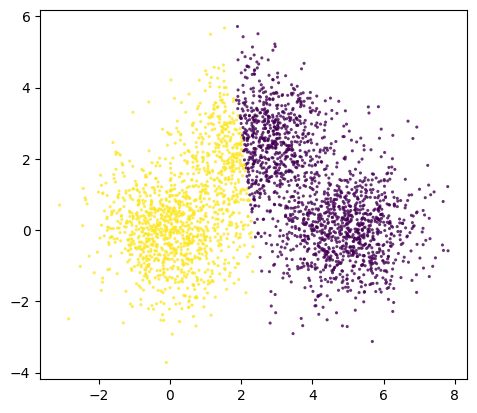

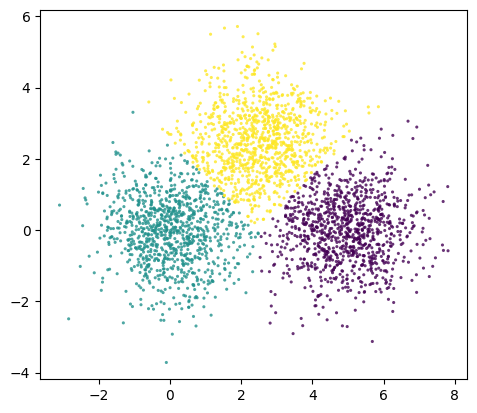

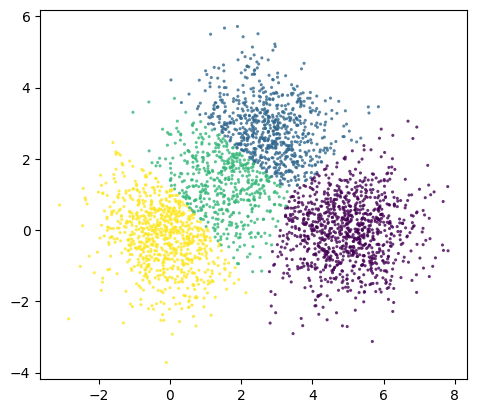

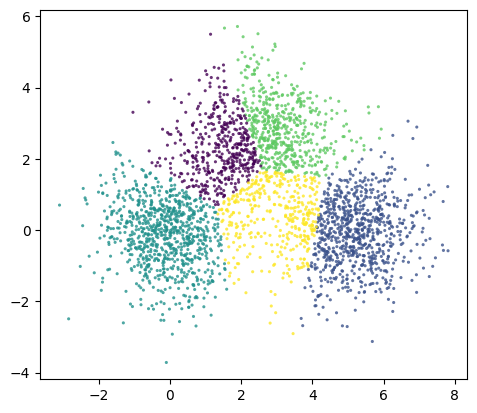

In [11]:
#3.1 k-means clustering
from sklearn.cluster import KMeans
for i in range(1,6):
    kmc = KMeans(init="k-means++",n_clusters=i,n_init="auto")
    X = test.iloc[:,0:2]
    kmc.fit(X)
    result = X.copy()
    result['cluster'] = kmc.predict(X).tolist()
    plt.scatter(result.iloc[:,0], result.iloc[:,1], alpha=0.8, c=result.iloc[:,2], edgecolors='none', s=5)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

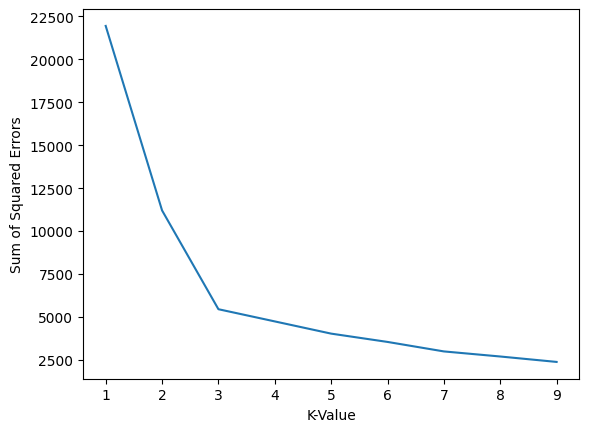

In [12]:
#3.2 Elbow methode
k = range(1,10)
sum_squared_errors = []

for i in k:
  model = KMeans(init="k-means++",n_clusters=i,n_init="auto")
  model.fit_predict(X)
  sum_squared_errors.append(model.inertia_)

plt.plot(k,sum_squared_errors)
plt.xlabel('K-Value')
plt.ylabel('Sum of Squared Errors')
plt.show()

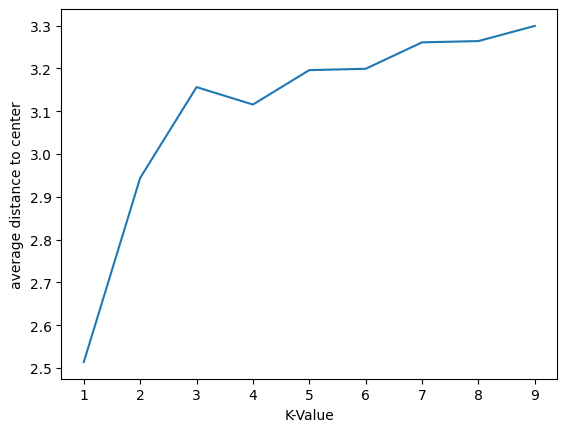

In [13]:
from scipy.spatial.distance import cdist
k = range(1,10)
dists= []

for i in k:
  model = KMeans(init="k-means++",n_clusters=i,n_init="auto")
  model.fit_predict(X)
  dists.append(cdist(X,model.cluster_centers_,metric='euclidean').mean())
plt.plot(k,dists)
plt.xlabel('K-Value')
plt.ylabel('average distance to center')
plt.show()

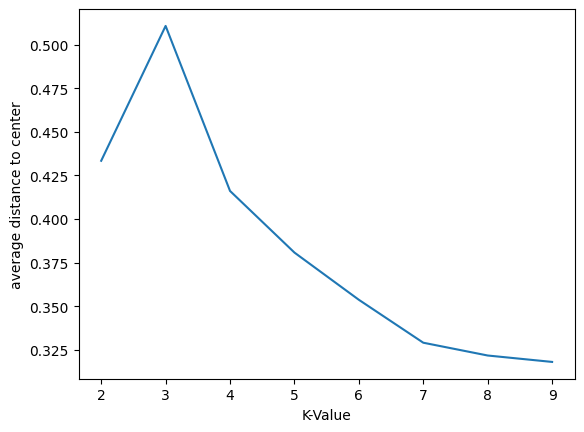

In [14]:
from sklearn.metrics import silhouette_score
k = range(2,10) # minimum 2 labels required
scores= []

for i in k:
  model = KMeans(init="k-means++",n_clusters=i,n_init="auto")
  model.fit(X)
  scores.append(silhouette_score(X, model.predict(X)))
plt.plot(k,scores)
plt.xlabel('K-Value')
plt.ylabel('average distance to center')
plt.show()

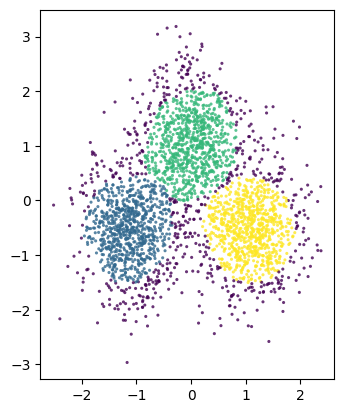

In [15]:
#3.3 DBSCANb
from sklearn.cluster import DBSCAN
data = StandardScaler().fit_transform(X)
dbscan = DBSCAN(eps=0.38, min_samples=150)
model = dbscan.fit(data)
labels = model.labels_
result = data.copy()
result = pd.DataFrame(result)
result['cluster'] = labels.tolist()
plt.scatter(result.iloc[:,0], result.iloc[:,1], alpha=0.8, c=result.iloc[:,2], edgecolors='none', s=5)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

### Deel 4 : Neurale Netwerken 

**Oefening 4**
Gegeven onderstaande 2 dimensionale data verkregen door toepassing van de Xor functie. 

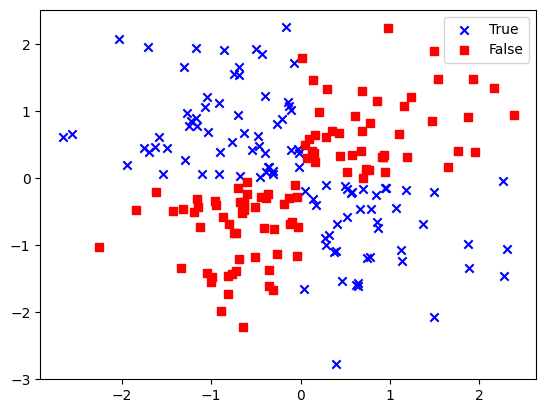

In [16]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


np.random.seed(0)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0)
#y_xor = np.where(y_xor, 1, -1) # map True -> 1 , False -> -1
plt.scatter(X_xor[y_xor, 0], X_xor[y_xor, 1], c='b', marker='x', label='True')
plt.scatter(X_xor[y_xor == False, 0], X_xor[y_xor== False, 1], c='r', marker='s', label='False')
plt.ylim(-3.0)
plt.legend()
plt.show()


__4.1__ Ga na hoe een multi layer perception model presteert op deze data. Gebruik niet de default instellingen van de parameters maar onderzoek telkens met welke instellingen het leermodel minimaal / maximaal presteert. Je kan de evaluatie van je settings visueel beoordelen door de decision boundary te plotten (gebruik hiertoe weer een grid van (x,y) coördinaten die de volledige rechthoek omvat - zie code onderaan) Maar uiteraard zou je ook een grid_search kunnnen uitvoeren en de accuracies vergelijken.

Vermits de data 'netjes' gegenereerd werd hoef je hier geen schaling toe te passen.

In [17]:
x1_min, x1_max = X_xor[:, 0].min() - 1, X_xor[:, 0].max() + 1
x2_min, x2_max = X_xor[:, 1].min() - 1, X_xor[:, 1].max() + 1
print(x1_min, x1_max)
print(x2_min, x2_max)

grid = np.mgrid[x1_min:x1_max:0.05, x2_min:x2_max:0.05].reshape(2,-1).T #veranderd naar step size 0.05 omdat anders teveel punten voor handen zijn
print(len(grid))

-3.659172237996741 3.383144774863942
-3.77259275642665 3.2567234972982093
19881


C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


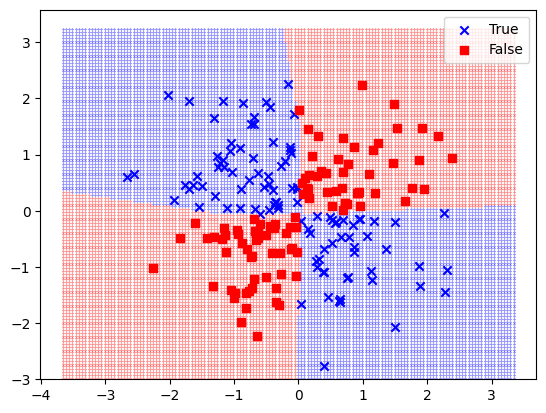

0.995


In [18]:
#4.1
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=[5], learning_rate_init=0.3,solver="sgd",max_iter=150)
clf.fit(X_xor, y_xor)
pred = clf.predict(X_xor)


boundary = clf.predict(grid)
plt.scatter(grid[boundary, 0], grid[boundary, 1], c='b', s=0.1)
plt.scatter(grid[boundary == False, 0], grid[boundary== False, 1], c='r', s=0.1)
plt.ylim(-3.0)

plt.scatter(X_xor[pred, 0], X_xor[pred, 1], c='b', marker='x', label='True')
plt.scatter(X_xor[pred == False, 0], X_xor[pred== False, 1], c='r', marker='s', label='False')
plt.ylim(-3.0)
plt.legend()
plt.show()
print(clf.score(X_xor, y_xor))